## COMPSCI 371D Homework 2

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D    # Do not remove this import
from math import floor, ceil
import warnings

## Part 1: Functions in Machine Learning

### Problem 1.1 (Exam-Style)

Domain: $X = [x_0, x_2, ..., x_{24}]$ where each $x_i$ is limited to $0 < x_i < 2^{16} - 1$

Range: $Y = [$Covered in Vegetation, Not Covered in Vegetation$]$

### Problem 1.2 (Exam-Style)

$h$ is a __Classifier__.

### Problem 1.3 (Exam-Style)

We can use the _zero-one_ loss function

$$
\ell ( y, \hat y) = \begin{cases} 0 & \text{for } y = \hat y \\ 1 & \text{otherwise}  \end{cases}
$$

because our range $Y$ is binary so we can only care about if the classifier is correct or not.

### Problem 1.4 (Exam-Style)

The predictor will most likely work well since the hardest part of getting a training set is labeling the training set. Since the set samples provided are already annotated, and there are a lot of them, the classifier will have a lot of samples to test with, which will allow for it to better deal with new data that it has not come across.

## Part 2: The $L_1$ Loss

### Problem 2.1

In [2]:
def plot_function(function, ax, variable_range=(-1, 1), samples=101):
    t = np.linspace(variable_range[0], variable_range[1], num=samples)
    x, y = np.meshgrid(t, t)
    ax.plot_surface(x, y, function(x, y), cmap=plt.get_cmap('viridis'))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

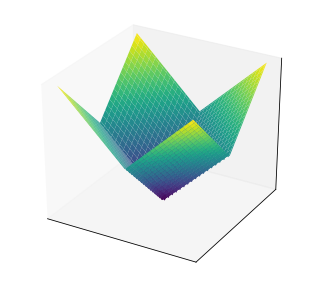

In [3]:
fig = plt.figure(figsize=(12, 5))

subplot_1 = fig.add_subplot(1, 2, 1, projection='3d')

variable_range=(-1, 1)

samples=101

def l(x, y):
    return abs(0 - x) + abs(0-y)

plot_function(l, subplot_1, variable_range=variable_range, samples=samples)

### Problem 2.2 (Exam-Style)

The roots of the first derivative of $L_1(m)$ cannot be bound using standard calculas techniques.

### Problem 2.3 (Exam-Style)

$L_1(m)$ can be minimized one component at a time because you are essentially finding the gradient of $L_1(m)$. By minimizing each point $L_1(m)$ with respect to each dimention, you can find the overall minimum point, which will minimize the function the most.

### Problem 2.4 (Exam-Style)

Yes

### Problem 2.5 (Exam-Style)

Because there are more points on the right of $m$ than on the left of $m$, as $m$ moves from $x_2$ towards $x_3$, the new distances of the points on the right of $m$ will affect $L_1(m)$ more than the new distances from the points left of $m$. When $m$ moves a $\Delta x$ distance to the right, for the 5 points on the right of $m$, their average distance will change by $-\Delta x$, while the two points to the left of $m$ will have their lengths changed by $+\Delta x$, so the overall change will be $-3\Delta x$, which is a negative linear amount.

### Problem 2.6

Givien a set of size N, the $arg\underset{m}{min} L_1(m)$ can be found when $m =(x_1 + x_2 + x_3 +...+x_n)/N$

## Part 3: Intuition in Many Dimensions

In [4]:
from math import gamma, sqrt


def gaussian_sample(n, d):
    mean = np.zeros(d)
    mean_distance = 2 * gamma((d + 1) / 2) / gamma(d / 2) if d < 200 else sqrt(2 * d)
    covariance = np.eye(d) / pow(mean_distance, 2)
    return np.random.multivariate_normal(mean, covariance, size=n)

In [5]:
from matplotlib import pyplot as plt

def show_histogram(x, d):
    density, _, _ = plt.hist(x=x, bins='auto', density=True, rwidth=0.9)
    mean = np.mean(x)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Distance')
    plt.ylabel('Empirical Density')
    format_string = '{} dimension{}. Mean distance {:.2f}'
    plt.title(format_string.format(d, 's' if d > 1 else '', mean))

### Problem 3.1

In [6]:
def distances(points):
    distances = []
    for i in range(len(points)):
        save_point = points[i]
        for k in range(i+1, len(points)):
            curr_point = points[k]
            distance = 0
            for n in range(len(save_point)):
                distance += np.power(save_point[n] - curr_point[n],2)
            distances.append(round(sqrt(distance),4))
    return distances

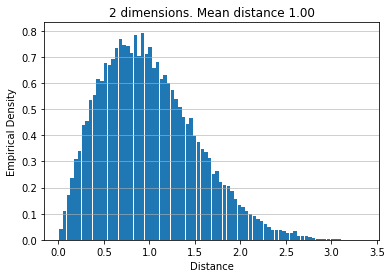

In [7]:
points = gaussian_sample(300,2)
dis = distances(points)
show_histogram(dis, 2)

### Problem 3.2

In [8]:
def show_histogram(x, d):
    density, _, _ = plt.hist(x=x, bins='auto', density=True, rwidth=0.9)
    mean = np.mean(x)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Distance')
    plt.ylabel('Empirical Density')
    format_string = '{} dimension{}. Mean distance {:.2f}'
    plt.title(format_string.format(d, 's' if d > 1 else '', mean))

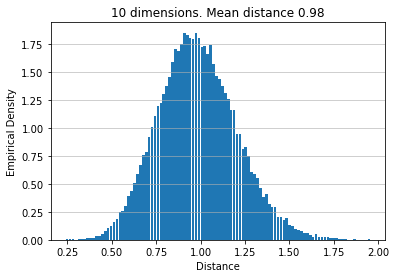

In [9]:
d1 = distances(gaussian_sample(300,10))
show_histogram(d1,10)

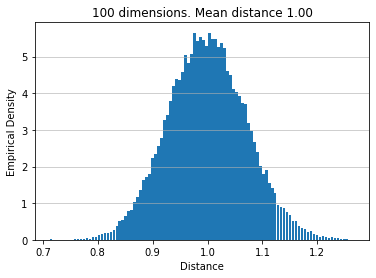

In [10]:
d2 = distances(gaussian_sample(300,100))
show_histogram(d2,100)

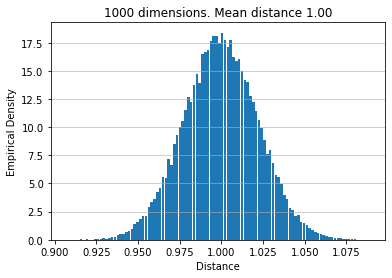

In [11]:
d3 = distances(gaussian_sample(300,1000))
show_histogram(d3,1000)

### Problem 3.3

While the four plots may look the same, the amount of data behind each plot is very different, with the $d=1000$ data set having exponentially more data than the $d=2$ data set. 

### Problem 3.4

Despite each plot having the same number of points, when comparing the distances between individual points, since the higher dimension points have more data per point to compare against, it greatly increases the amount of time it takes to compute the distance.

## Part 4: Data Transformations

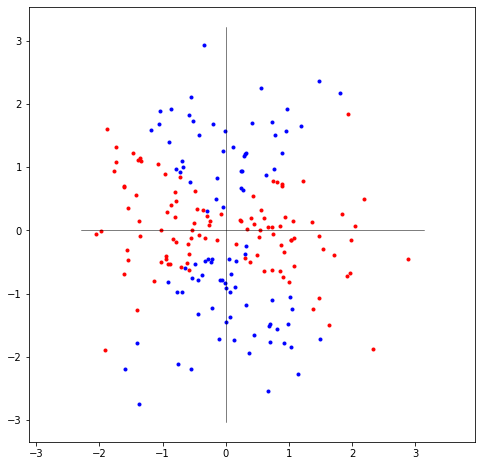

In [12]:
import pickle


file_name = 'data.p'
with open(file_name, 'rb') as file:
    data = pickle.load(file)
x, y = data['x'], data['y']

plt.figure(figsize=(8, 8))
positive = x[y > 0]
negative = x[y <= 0]
plt.plot(positive[:, 0], positive[:, 1], '.b')
plt.plot(negative[:, 0], negative[:, 1], '.r')
x_limits, y_limits = plt.xlim(), plt.ylim()
plt.plot(x_limits, [0, 0], 'k', linewidth=0.5)
plt.plot([0, 0], y_limits, 'k', linewidth=0.5)
plt.axis('equal')
plt.show()

### Problem 4.1

Since the negative points tend to follow the line $y=-\frac{1}{2}x$, we can use a transformation that takes the vertical distance from the line. Then be finding the distance that most negative points are away from the line, we can set that value as the threshold.

The transformation for a point $x = (x_1, y_1)$ would look like $z = \sqrt{(-\frac{1}{2} x_1 - y_1)^2}$

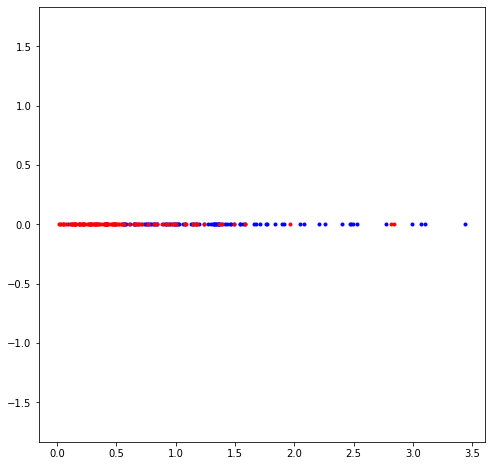

In [13]:
def transform(x):
    z = []
    for i in x:
        n = sqrt(np.power(-.5*i[0] - i[1],2))
        z.append(n)
    return np.array(z)

z = transform(x)
plt.figure(figsize=(8, 8))
positive = z[y > 0]
negative = z[y <= 0]
plt.plot(positive, np.zeros(len(positive)), '.b')
plt.plot(negative, np.zeros(len(negative)), '.r')
y_limits = plt.ylim(-1,1)
plt.axis('equal')
plt.show()

### Problem 4.2

(i)

In [14]:
def h(z, threshold):
    y_hat = []
    for i in z:
        if i > threshold:
            y_hat.append(1)
        else:
            y_hat.append(-1)
    return np.array(y_hat)

(ii)

In [15]:
def risk(y, y_hat):
    risk = 0
    for i in range(len(y)):
        if y[i] != y_hat[i]:
            risk += 1
    return risk

(iii)

In [16]:
def find_threshold(z, y):
    z_sorted = np.sort(z)
    best_t = -10000
    min_risk = 10000
    t_and_r = [[]]
    t_his = []
    r_his = []
    for i in range(len(z)-1):
        t = (z_sorted[i] + z_sorted[i+1])/2
        y_hat = h(z_sorted, t)
        new_risk = risk(y, y_hat)
        t_and_r.append([t, new_risk])
        t_his.append(t)
        r_his.append(new_risk)
        if new_risk < min_risk:
            min_risk = new_risk
            best_t = t
    return best_t, min_risk, t_his, r_his

In [17]:
t, r, t_his, r_his = find_threshold(z, y)

In [18]:
print("Best Threshold: ",round(t,4))

Best Threshold:  2.3319


In [19]:
print("Minimum Risk: ", round(r,4))

Minimum Risk:  92


Text(0, 0.5, 'Risk')

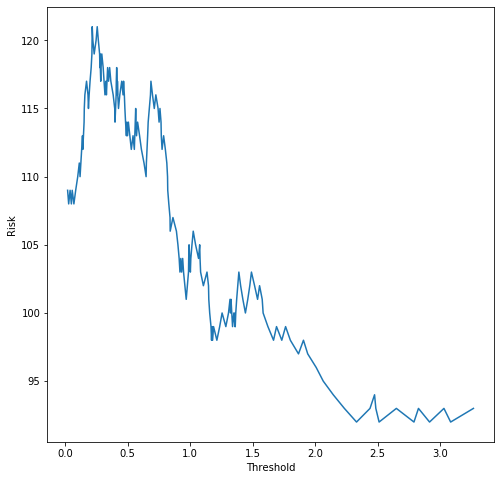

In [20]:
plt.figure(figsize=(8, 8))

plt.plot(t_his, r_his)
plt.xlabel('Threshold')
plt.ylabel('Risk')